In [ ]:
!pip install noisereduce
!pip install praat-parselmouth
!pip install --upgrade librosa
!pip install librosa scipy
!pip install pysptk
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.9/461.9 kB 25.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pysptk: filename=pysptk-1.0.1-cp310-cp310-linux_x86_64.whl size=1241917 sha256=e0cdcd0b86a443d1b42c739336706a605d7d79e6e5d89901c7ba323cc0b893c3
  Stored in directory: /root/.cache/pip/wheels/ba/c2/7f/73c54e1795eeca8f995f95474c8290b78ee0a6306412dc934f
Successfully built pysptk


In [ ]:
pip install transformers

In [ ]:
import numpy as np
import os
import pandas as pd
import re
import librosa
import parselmouth
from parselmouth.praat import call
import scipy.stats as stats
import scipy
import pysptk
from scipy.io import wavfile
from tqdm import tqdm
from google.colab import drive

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Proceed with splitting the data and training the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Google Colab specific
drive.mount('/content/drive')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/drive


In [ ]:
import re
from transformers import BertTokenizer, BertModel
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AdamW
from sklearn.metrics import classification_report
from tqdm import tqdm

# Download NLTK tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/Shared drives/CS298/CS 297/IEMOCAP/IEMOCAP_Updated.csv')

In [ ]:
df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,...,Valence,Dominance,dimension,category,act,val,dom,New_Category,Final_class,Unnamed: 20
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 3]","[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,4","3,3","4,4",Nervous,NaN,NaN
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[4, 4]","[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,5","2,2","3,4",Nervous,NaN,NaN
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[3, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","3,3","3,4",Nervous,NaN,NaN
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 4]","[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","['Frustration', 'Fear', 'Excited']","3,5","3,2","3,4",Nervous,NaN,NaN
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[4, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","2,3","3,4",Nervous,NaN,NaN


In [ ]:
print(type(df['category'].iloc[0]))

<class 'str'>


In [ ]:
import ast

# Apply ast.literal_eval to convert string to list
df['category'] = df['category'].apply(lambda x: ast.literal_eval(x))
print(type(df['category'].iloc[0]))


<class 'list'>


In [ ]:
df['category'].iloc[0]

['Frustration', 'Fear', 'Excited']

In [ ]:
import pandas as pd
from collections import Counter

# Step 1: Copy df to new_df
new_df = df.copy()

# Step 2: Function to find the most repeated label (case insensitive)
def find_most_repeated_label(label_list):
    # Convert all items to lowercase
    lower_case_labels = [label.lower() for label in label_list]

    # Count the occurrences of each label
    label_counts = Counter(lower_case_labels)

    # Find the label(s) that repeat more than once
    most_common_label, count = label_counts.most_common(1)[0]  # Get the most common label

    # If it repeats more than once, return it, otherwise return None
    if count > 1:
        return most_common_label
    else:
        return None

# Step 3: Apply the function to each row in the 'category' column and create a new column 'most_repeated_label'
new_df['most_repeated_label'] = new_df['category'].apply(lambda x: find_most_repeated_label(x))


In [ ]:
new_df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,...,Dominance,dimension,category,act,val,dom,New_Category,Final_class,Unnamed: 20,most_repeated_label
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","[Frustration, Fear, Excited]","2,4","3,3","4,4",Nervous,NaN,NaN,None
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","[Frustration, Fear, Excited]","2,5","2,2","3,4",Nervous,NaN,NaN,None
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","[Fear, Fear, Excited]","2,4","3,3","3,4",Nervous,NaN,NaN,fear
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","[Frustration, Fear, Excited]","3,5","3,2","3,4",Nervous,NaN,NaN,None
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","[Fear, Fear, Excited]","2,4","2,3","3,4",Nervous,NaN,NaN,fear


In [ ]:
new_df = new_df.drop(columns=['act', 'val', 'dom', 'New_Category', 'Final_class', 'Unnamed: 20'])


In [ ]:
new_df = new_df.drop(columns=['Major_Emotion', 'Major_emotion','Major', 'Arousal', 'Valence', 'Dominance', 'dimension'])


In [ ]:
new_df = new_df[new_df['most_repeated_label'].notna()]

In [ ]:
len(new_df)

7766

In [ ]:
label_counts = new_df['most_repeated_label'].value_counts()

print(label_counts)

most_repeated_label
frustration    2026
neutral        1710
excited        1174
sadness        1075
anger          1042
happiness       586
surprise        102
fear             34
other            14
disgust           3
Name: count, dtype: int64


In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Function to count tokens in the 'Transcript' column
def count_tokens(text):
    tokens = word_tokenize(text)  # Tokenize the text
    return len(tokens)

# Filter rows where the 'Transcript' column has 10 or more tokens
new_df['token_count'] = new_df['Transcript'].apply(count_tokens)
filtered_df = new_df[new_df['token_count'] >= 10]

# Drop the auxiliary 'token_count' column if you no longer need it
filtered_df = filtered_df.drop(columns=['token_count'])

In [ ]:
new_df = filtered_df

In [ ]:
import pandas as pd

# Modify the labels according to the merging criteria
new_df['most_repeated_label'] = new_df['most_repeated_label'].replace({
    'frustration': 'anger',   # Merge 'frustration' into 'anger'
    'excited': 'happy',       # Merge 'excited' into 'happy'
    'happiness': 'happy'      # Merge 'happiness' into 'happy'
})

# Drop rows with the labels: 'surprise', 'fear', 'other', and 'disgust'
new_df = new_df[~new_df['most_repeated_label'].isin(['surprise', 'fear', 'other', 'disgust'])]

# Print updated value counts to verify
print(new_df['most_repeated_label'].value_counts())


most_repeated_label
anger      1973
happy      1046
neutral     877
sadness     575
Name: count, dtype: int64


In [ ]:
new_df.to_csv('IEMOCAP_MAJOR_LABELLED.csv', index=False)

In [ ]:
# Preprocessing function
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = nltk.word_tokenize(text)  # Tokenize text
    return " ".join(tokens)

In [ ]:
new_df['cleaned_text'] = new_df['Transcript'].apply(preprocess)

<ipython-input-62-309e3491fb94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_text'] = new_df['Transcript'].apply(preprocess)


In [ ]:
# Encode the target labels
label_encoder = LabelEncoder()
new_df['encoded_label'] = label_encoder.fit_transform(new_df['most_repeated_label'])

<ipython-input-63-f86d586bc021>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['encoded_label'] = label_encoder.fit_transform(new_df['most_repeated_label'])


##RoBERTA

In [ ]:
# Define the alternative transformer model you want to use
MODEL_NAME = 'roberta-base'  # Options: 'roberta-base', 'distilbert-base-uncased', 'albert-base-v2'

# Initialize tokenizer for the selected model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Custom dataset class
class EmotionDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=128,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in tqdm(data_loader, leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)
        _, preds = torch.max(outputs.logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()

    return correct_predictions.double() / len(data_loader.dataset), sum(losses) / len(losses)

# Evaluation function
def eval_model(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return correct_predictions.double() / len(data_loader.dataset), predictions, true_labels

In [ ]:
# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    new_df['cleaned_text'], new_df['encoded_label'], test_size=0.2, random_state=42
)

train_dataset = EmotionDataset(train_texts.tolist(), train_labels.tolist())
test_dataset = EmotionDataset(test_texts.tolist(), test_labels.tolist())

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4)

# Initialize the transformer model
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(label_encoder.classes_))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()



# Training loop
epochs = 5
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)
    print(f'Train accuracy: {train_acc:.4f}, Train loss: {train_loss:.4f}')

# Evaluate on test set
test_acc, preds, true_labels = eval_model(model, test_loader, device)
print(f'Test Accuracy: {test_acc:.4f}')
print(classification_report(true_labels, preds, target_names=label_encoder.classes_))

# Save the model and tokenizer if needed
model.save_pretrained("emotion_classification_model")
tokenizer.save_pretrained("emotion_classification_model")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5


Train accuracy: 0.5691, Train loss: 1.0408
Epoch 2/5


Train accuracy: 0.7606, Train loss: 0.6343
Epoch 3/5


Train accuracy: 0.8345, Train loss: 0.4407
Epoch 4/5


Train accuracy: 0.8831, Train loss: 0.3229
Epoch 5/5


Train accuracy: 0.9100, Train loss: 0.2478
Test Accuracy: 0.7296
              precision    recall  f1-score   support

       anger       0.79      0.81      0.80       396
       happy       0.84      0.69      0.76       202
     neutral       0.50      0.60      0.55       186
     sadness       0.79      0.73      0.76       111

    accuracy                           0.73       895
   macro avg       0.73      0.71      0.72       895
weighted avg       0.74      0.73      0.73       895



('emotion_classification_model/tokenizer_config.json',
 'emotion_classification_model/special_tokens_map.json',
 'emotion_classification_model/vocab.json',
 'emotion_classification_model/merges.txt',
 'emotion_classification_model/added_tokens.json',
 'emotion_classification_model/tokenizer.json')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Evaluate on test set
test_acc, preds, true_labels = eval_model(model, test_loader, device)
print(f'Test Accuracy: {test_acc:.4f}')

# Detailed classification report
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=label_encoder.classes_))

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(true_labels, preds)
print(conf_matrix)

# Additional metrics
accuracy = accuracy_score(true_labels, preds)
f1 = f1_score(true_labels, preds, average='macro')
weighted_f1 = f1_score(true_labels, preds, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Test Accuracy: 0.7296
Classification Report:
              precision    recall  f1-score   support

       anger       0.79      0.81      0.80       396
       happy       0.84      0.69      0.76       202
     neutral       0.50      0.60      0.55       186
     sadness       0.79      0.73      0.76       111

    accuracy                           0.73       895
   macro avg       0.73      0.71      0.72       895
weighted avg       0.74      0.73      0.73       895

Confusion Matrix:
[[321   6  58  11]
 [ 17 139  43   3]
 [ 50  17 112   7]
 [ 16   4  10  81]]
Overall Accuracy: 0.7296
Macro F1 Score: 0.7165
Weighted F1 Score: 0.7337


Test Accuracy: 0.7296
Classification Report:
              precision    recall  f1-score   support

       anger       0.79      0.81      0.80       396
       happy       0.84      0.69      0.76       202
     neutral       0.50      0.60      0.55       186
     sadness       0.79      0.73      0.76       111

    accuracy                           0.73       895
   macro avg       0.73      0.71      0.72       895
weighted avg       0.74      0.73      0.73       895



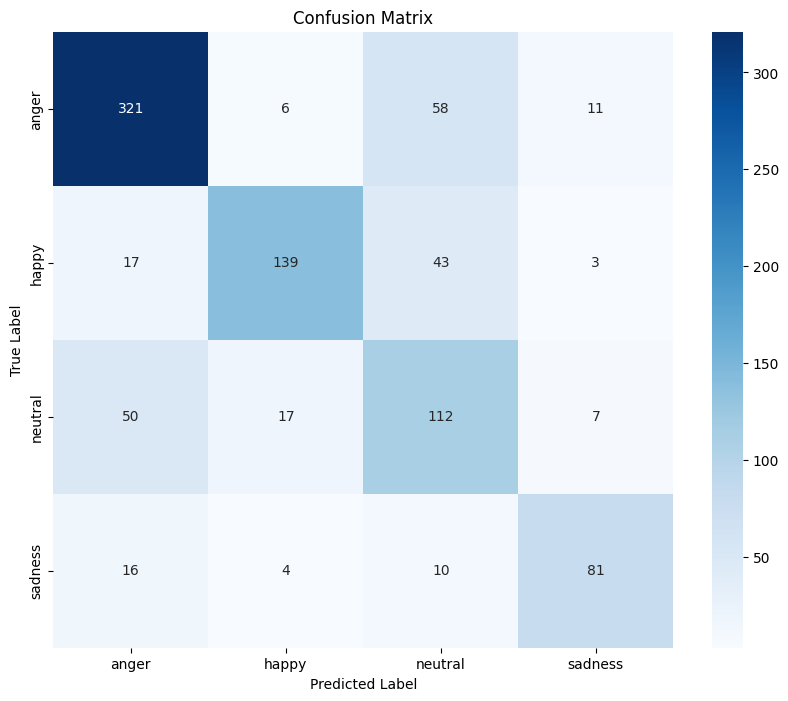

Overall Accuracy: 0.7296
Macro F1 Score: 0.7165
Weighted F1 Score: 0.7337


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Evaluate on test set
test_acc, preds, true_labels = eval_model(model, test_loader, device)
print(f'Test Accuracy: {test_acc:.4f}')

# Detailed classification report
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, preds)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Additional metrics
accuracy = accuracy_score(true_labels, preds)
f1 = f1_score(true_labels, preds, average='macro')
weighted_f1 = f1_score(true_labels, preds, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Weighted F1 Score: {weighted_f1:.4f}")


In [ ]:
import torch

# Specify the path where the model will be saved
model_path = "emotion_classification_model.pth"

# Save the entire model
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'config': model.config,  # Optional: saves the model configuration
    'label_encoder': label_encoder  # Optional: saves the label encoder if used
}, model_path)

print(f"Model saved to {model_path}")

Model saved to emotion_classification_model.pth


##DistilBert


In [ ]:
# Define the alternative transformer model you want to use
MODEL_NAME = 'distilbert-base-uncased'  # Options: 'roberta-base', 'distilbert-base-uncased', 'albert-base-v2'

# Initialize tokenizer for the selected model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Custom dataset class
class EmotionDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=128,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in tqdm(data_loader, leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)
        _, preds = torch.max(outputs.logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()

    return correct_predictions.double() / len(data_loader.dataset), sum(losses) / len(losses)

# Evaluation function
def eval_model(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return correct_predictions.double() / len(data_loader.dataset), predictions, true_labels


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    new_df['cleaned_text'], new_df['encoded_label'], test_size=0.2, random_state=42
)

train_dataset = EmotionDataset(train_texts.tolist(), train_labels.tolist())
test_dataset = EmotionDataset(test_texts.tolist(), test_labels.tolist())

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4)

# Initialize the transformer model
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(label_encoder.classes_))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()



# Training loop
epochs = 3
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)
    print(f'Train accuracy: {train_acc:.4f}, Train loss: {train_loss:.4f}')

# Evaluate on test set
test_acc, preds, true_labels = eval_model(model, test_loader, device)
print(f'Test Accuracy: {test_acc:.4f}')
print(classification_report(true_labels, preds, target_names=label_encoder.classes_))

# Save the model and tokenizer if needed
model.save_pretrained("emotion_classification_model")
tokenizer.save_pretrained("emotion_classification_model")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3


Train accuracy: 0.5529, Train loss: 1.0525
Epoch 2/3


Train accuracy: 0.7286, Train loss: 0.7008
Epoch 3/3


Train accuracy: 0.8146, Train loss: 0.4918
Test Accuracy: 0.6802
              precision    recall  f1-score   support

       anger       0.75      0.75      0.75       624
       happy       0.78      0.74      0.76       345
     neutral       0.50      0.57      0.53       327
     sadness       0.62      0.56      0.59       227

    accuracy                           0.68      1523
   macro avg       0.66      0.66      0.66      1523
weighted avg       0.69      0.68      0.68      1523



('emotion_classification_model/tokenizer_config.json',
 'emotion_classification_model/special_tokens_map.json',
 'emotion_classification_model/vocab.txt',
 'emotion_classification_model/added_tokens.json',
 'emotion_classification_model/tokenizer.json')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Evaluate on test set
test_acc, preds, true_labels = eval_model(model, test_loader, device)
print(f'Test Accuracy: {test_acc:.4f}')

# Detailed classification report
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=label_encoder.classes_))

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(true_labels, preds)
print(conf_matrix)

# Additional metrics
accuracy = accuracy_score(true_labels, preds)
f1 = f1_score(true_labels, preds, average='macro')
weighted_f1 = f1_score(true_labels, preds, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Test Accuracy: 0.6802
Classification Report:
              precision    recall  f1-score   support

       anger       0.75      0.75      0.75       624
       happy       0.78      0.74      0.76       345
     neutral       0.50      0.57      0.53       327
     sadness       0.62      0.56      0.59       227

    accuracy                           0.68      1523
   macro avg       0.66      0.66      0.66      1523
weighted avg       0.69      0.68      0.68      1523

Confusion Matrix:
[[466  21  94  43]
 [ 24 257  54  10]
 [ 82  36 185  24]
 [ 48  17  34 128]]
Overall Accuracy: 0.6802
Macro F1 Score: 0.6588
Weighted F1 Score: 0.6820


Test Accuracy: 0.6802
Classification Report:
              precision    recall  f1-score   support

       anger       0.75      0.75      0.75       624
       happy       0.78      0.74      0.76       345
     neutral       0.50      0.57      0.53       327
     sadness       0.62      0.56      0.59       227

    accuracy                           0.68      1523
   macro avg       0.66      0.66      0.66      1523
weighted avg       0.69      0.68      0.68      1523



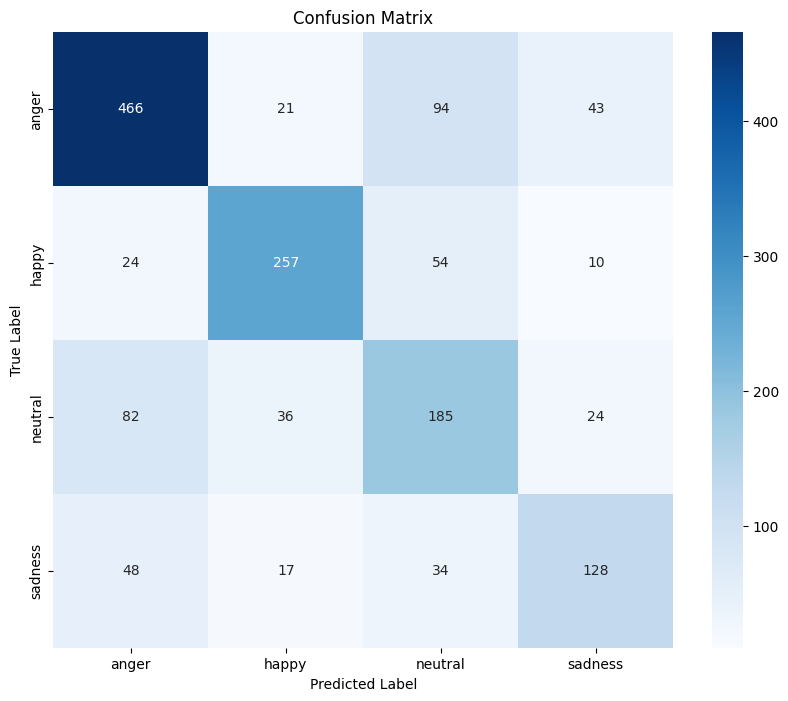

Overall Accuracy: 0.6802
Macro F1 Score: 0.6588
Weighted F1 Score: 0.6820


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Evaluate on test set
test_acc, preds, true_labels = eval_model(model, test_loader, device)
print(f'Test Accuracy: {test_acc:.4f}')

# Detailed classification report
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, preds)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Additional metrics
accuracy = accuracy_score(true_labels, preds)
f1 = f1_score(true_labels, preds, average='macro')
weighted_f1 = f1_score(true_labels, preds, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Weighted F1 Score: {weighted_f1:.4f}")


XLNET

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3


Train accuracy: 0.4072, Loss: 1.3114
Epoch 2/3


Train accuracy: 0.5749, Loss: 1.0258
Epoch 3/3


Train accuracy: 0.7011, Loss: 0.7624
Test Accuracy: 0.6520
Classification Report:
              precision    recall  f1-score   support

       anger       0.70      0.80      0.75       624
       happy       0.82      0.61      0.70       345
     neutral       0.57      0.38      0.45       327
     sadness       0.48      0.70      0.57       227

    accuracy                           0.65      1523
   macro avg       0.64      0.62      0.62      1523
weighted avg       0.66      0.65      0.65      1523

Confusion Matrix:
[[500  13  46  65]
 [ 54 212  32  47]
 [121  22 123  61]
 [ 43  11  15 158]]
Overall Accuracy: 0.6520
Macro F1 Score: 0.6169
Weighted F1 Score: 0.6463


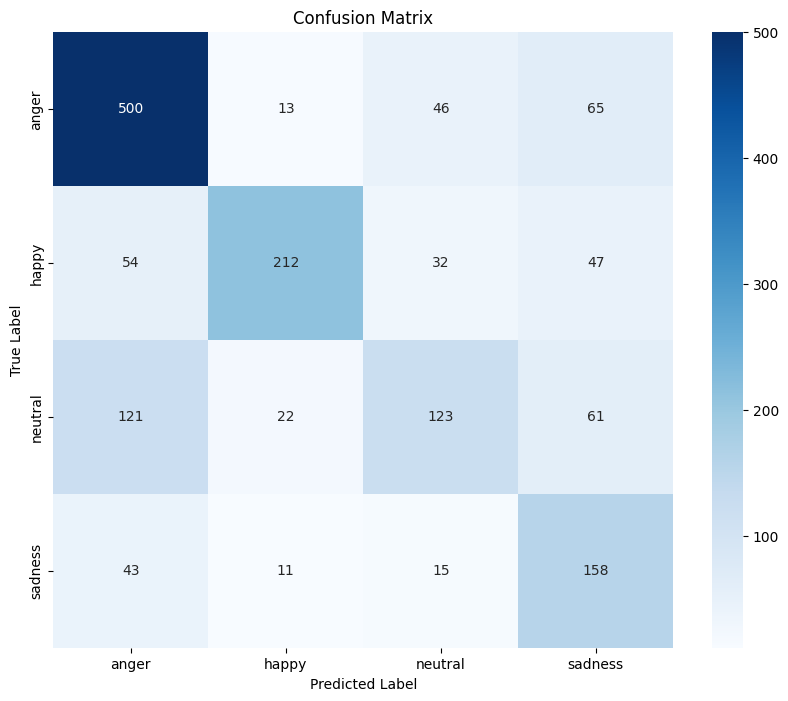

In [ ]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification, AdamW

MODEL_NAME = 'xlnet-base-cased'
tokenizer = XLNetTokenizer.from_pretrained(MODEL_NAME)

# Custom dataset class
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    new_df['Transcript'], new_df['encoded_label'], test_size=0.2, random_state=42
)

train_dataset = EmotionDataset(train_texts.tolist(), train_labels.tolist(), tokenizer)
test_dataset = EmotionDataset(test_texts.tolist(), test_labels.tolist(), tokenizer)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4)

# Initialize the XLNet model
model = XLNetForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(label_encoder.classes_))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in tqdm(data_loader, leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)
        _, preds = torch.max(outputs.logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()

    return correct_predictions.double() / len(data_loader.dataset), sum(losses) / len(losses)

# Evaluation function
def eval_model(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return correct_predictions.double() / len(data_loader.dataset), predictions, true_labels

# Training loop
epochs = 3
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)
    print(f'Train accuracy: {train_acc:.4f}, Loss: {train_loss:.4f}')

# Evaluate on test set
test_acc, preds, true_labels = eval_model(model, test_loader, device)
print(f'Test Accuracy: {test_acc:.4f}')

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=label_encoder.classes_))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(true_labels, preds)
print(conf_matrix)

# Additional metrics
accuracy = accuracy_score(true_labels, preds)
f1 = f1_score(true_labels, preds, average='macro')
weighted_f1 = f1_score(true_labels, preds, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Weighted F1 Score: {weighted_f1:.4f}")

# Plot confusion matrix as an image (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Epoch 1/5


Train accuracy: 0.7704, Loss: 0.6044
Epoch 2/5


Train accuracy: 0.8071, Loss: 0.5068
Epoch 3/5


Train accuracy: 0.8461, Loss: 0.4178
Epoch 4/5


Train accuracy: 0.8677, Loss: 0.3607
Epoch 5/5


Train accuracy: 0.8722, Loss: 0.3328
Test Accuracy: 0.6533
Classification Report:
              precision    recall  f1-score   support

       anger       0.78      0.66      0.72       624
       happy       0.72      0.75      0.74       345
     neutral       0.49      0.51      0.50       327
     sadness       0.53      0.68      0.59       227

    accuracy                           0.65      1523
   macro avg       0.63      0.65      0.64      1523
weighted avg       0.67      0.65      0.66      1523

Confusion Matrix:
[[414  37 111  62]
 [ 17 258  36  34]
 [ 70  45 168  44]
 [ 28  17  27 155]]
Overall Accuracy: 0.6533
Macro F1 Score: 0.6373
Weighted F1 Score: 0.6571


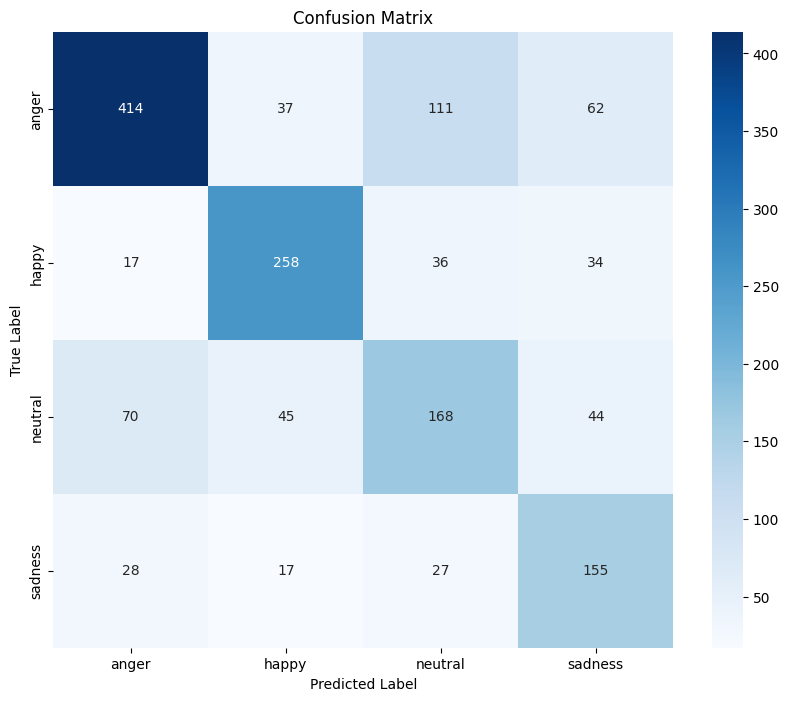

In [ ]:
epochs = 5
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)
    print(f'Train accuracy: {train_acc:.4f}, Loss: {train_loss:.4f}')

# Evaluate on test set
test_acc, preds, true_labels = eval_model(model, test_loader, device)
print(f'Test Accuracy: {test_acc:.4f}')

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=label_encoder.classes_))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(true_labels, preds)
print(conf_matrix)

# Additional metrics
accuracy = accuracy_score(true_labels, preds)
f1 = f1_score(true_labels, preds, average='macro')
weighted_f1 = f1_score(true_labels, preds, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Weighted F1 Score: {weighted_f1:.4f}")

# Plot confusion matrix as an image (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## BERT-BASE_UNCASED

In [ ]:
from tqdm import tqdm
#BERT tokenizer to convert text to BERT-compatible tokens
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class EmotionDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=128,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Define the model
class BERTEmotionClassifier(nn.Module):
    def __init__(self, n_classes):
        super(BERTEmotionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        pooled_output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )['pooler_output']
        output = self.drop(pooled_output)
        return self.out(output)



# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device):
    model = model.train()
    losses = []
    correct_predictions = 0
    loop = tqdm(data_loader, leave=False)

    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs, labels)
        _, preds = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Update tqdm description with current loss
        loop.set_description(f"Loss: {loss.item():.4f}")

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)



# Evaluation
def eval_model(model, data_loader, device):
    model = model.eval()
    correct_predictions = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            correct_predictions += torch.sum(preds == labels)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return correct_predictions.double() / len(data_loader.dataset), predictions, true_labels



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(new_df['cleaned_text'], new_df['encoded_label'], test_size=0.2, random_state=42)

train_dataset = EmotionDataset(train_texts.tolist(), train_labels.tolist())
test_dataset = EmotionDataset(test_texts.tolist(), test_labels.tolist())

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4)

In [ ]:
# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTEmotionClassifier(n_classes=len(label_encoder.classes_))
model = model.to(device)

# Loss function and optimizer
optimizer = optim.Adam(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
for epoch in range(5):  # For demo, you can increase this for better performance
    print(f'Epoch {epoch + 1}/{2}')
    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)
    print(f'Train accuracy: {train_acc}, Loss: {train_loss}')

Epoch 1/2


Train accuracy: 0.5568144499178982, Loss: 1.042341280657644
Epoch 2/2


Train accuracy: 0.7412151067323481, Loss: 0.6743111598060191
Epoch 3/2


Train accuracy: 0.8201970443349754, Loss: 0.47003170036180625
Epoch 4/2


Train accuracy: 0.8658456486042693, Loss: 0.34913264819648965
Epoch 5/2


Train accuracy: 0.8909688013136289, Loss: 0.28890287723879615


In [ ]:
# Evaluate on test set
test_acc, preds, true_labels = eval_model(model, test_loader, device)
print(f'Test Accuracy: {test_acc}')

# Display classification report
from sklearn.metrics import classification_report
print(classification_report(true_labels, preds, target_names=label_encoder.classes_))

Test Accuracy: 0.6992777413000656
              precision    recall  f1-score   support

       anger       0.75      0.79      0.77       624
       happy       0.73      0.83      0.78       345
     neutral       0.55      0.50      0.53       327
     sadness       0.68      0.54      0.60       227

    accuracy                           0.70      1523
   macro avg       0.68      0.67      0.67      1523
weighted avg       0.69      0.70      0.69      1523



In [ ]:
from sklearn.metrics import confusion_matrix

# Number of folds
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create a list to store results for each fold
fold_accuracies = []

# Convert text and labels to lists for cross-validation purposes
texts = new_df['cleaned_text'].tolist()
labels = new_df['encoded_label'].tolist()

# Check the size of the data
print(f"Number of samples in texts: {len(texts)}")
print(f"Number of samples in labels: {len(labels)}")

# Begin 5-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(texts)):
    print(f"Fold {fold+1}/{n_splits}")

    # Debug: Check the sizes of the indices
    print(f"Train indices size: {len(train_index)}, Val indices size: {len(val_index)}")

    # Split the data into training and validation sets for this fold
    try:
        train_texts = [texts[i] for i in train_index]
        val_texts = [texts[i] for i in val_index]
        train_labels = [labels[i] for i in train_index]
        val_labels = [labels[i] for i in val_index]
    except IndexError as e:
        print(f"IndexError: {e}")
        print(f"Text size: {len(texts)}, Label size: {len(labels)}")
        break  # Break the loop if there's an issue with indexing

    # Create the datasets and dataloaders for this fold
    train_dataset = EmotionDataset(train_texts, train_labels)
    val_dataset = EmotionDataset(val_texts, val_labels)

    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=4)

    # Reinitialize the model for each fold
    model = BERTEmotionClassifier(n_classes=len(label_encoder.classes_))
    model = model.to(device)

    # Reinitialize the optimizer and loss function for each fold
    optimizer = optim.Adam(model.parameters(), lr=2e-5)
    loss_fn = nn.CrossEntropyLoss()

    # Train for a few epochs (adjust as necessary)
    for epoch in range(3):  # Adjust epochs as needed
        print(f'Epoch {epoch + 1}/3')

        # Training step
        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)

        # Validation step
        val_acc, val_preds, val_true_labels = eval_model(model, val_loader, device)

        print(f'Train accuracy: {train_acc}, Train loss: {train_loss}')
        print(f'Validation accuracy: {val_acc}')

    # Generate and print confusion matrix for this fold
    cm = confusion_matrix(val_true_labels, val_preds)
    print(f'Confusion Matrix for Fold {fold + 1}:\n', cm)

    # Store the validation accuracy for this fold
    fold_accuracies.append(val_acc.item())

# After all folds are completed, calculate and display the average results
avg_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Validation Accuracy across {n_splits} folds: {avg_accuracy}")


Number of samples in texts: 7613
Number of samples in labels: 7613
Fold 1/5
Train indices size: 6090, Val indices size: 1523
Epoch 1/3


Train accuracy: 0.5504105090311987, Train loss: 1.0658269541305065
Validation accuracy: 0.665134602757715
Epoch 2/3


Train accuracy: 0.7361247947454844, Train loss: 0.6860257443419743
Validation accuracy: 0.6874589625738673
Epoch 3/3


Train accuracy: 0.8183908045977012, Train loss: 0.48189214709901584
Validation accuracy: 0.7019041365725541
Confusion Matrix for Fold 1:
 [[477  13 104  30]
 [ 22 256  50  17]
 [ 79  26 202  20]
 [ 48  10  35 134]]
Fold 2/5
Train indices size: 6090, Val indices size: 1523
Epoch 1/3


Train accuracy: 0.5589490968801314, Train loss: 1.0395266121780489
Validation accuracy: 0.6776099803020355
Epoch 2/3


Train accuracy: 0.7405582922824302, Train loss: 0.6557896729186911
Validation accuracy: 0.6835193696651346
Epoch 3/3


Train accuracy: 0.8251231527093597, Train loss: 0.45647729739781595
Validation accuracy: 0.6815495732107681
Confusion Matrix for Fold 2:
 [[464  16  90  51]
 [ 28 240  67  20]
 [ 71  39 189  28]
 [ 37   9  29 145]]
Fold 3/5
Train indices size: 6090, Val indices size: 1523
Epoch 1/3


Train accuracy: 0.5500821018062397, Train loss: 1.0608755462140687
Validation accuracy: 0.6329612606697308
Epoch 2/3


Train accuracy: 0.7380952380952381, Train loss: 0.680111458115353
Validation accuracy: 0.6690741956664478
Epoch 3/3


Train accuracy: 0.8269293924466339, Train loss: 0.4591326199273823
Validation accuracy: 0.6592252133946158
Confusion Matrix for Fold 3:
 [[432  23 111  65]
 [ 28 237  40  23]
 [ 77  41 192  36]
 [ 33   9  33 143]]
Fold 4/5
Train indices size: 6091, Val indices size: 1522
Epoch 1/3


Train accuracy: 0.549991791167296, Train loss: 1.0512484297332447
Validation accuracy: 0.6747700394218135
Epoch 2/3


Train accuracy: 0.7379740600886554, Train loss: 0.6789131897623337
Validation accuracy: 0.6793692509855453
Epoch 3/3


Train accuracy: 0.8190773272040716, Train loss: 0.4832238704907859
Validation accuracy: 0.6819973718791065
Confusion Matrix for Fold 4:
 [[465  11  88  43]
 [ 33 235  73  27]
 [ 65  42 214  24]
 [ 39  12  27 124]]
Fold 5/5
Train indices size: 6091, Val indices size: 1522
Epoch 1/3


Train accuracy: 0.5608274503365621, Train loss: 1.0532425700473456
Validation accuracy: 0.6360052562417872
Epoch 2/3


Train accuracy: 0.7442127729436874, Train loss: 0.6768285329316058
Validation accuracy: 0.6622864651773982
Epoch 3/3


Train accuracy: 0.8223608602856673, Train loss: 0.48396162793116104
Validation accuracy: 0.6655716162943496
Confusion Matrix for Fold 5:
 [[445  29  64  47]
 [ 33 280  25  26]
 [ 94  70 148  53]
 [ 37  23   8 140]]

Average Validation Accuracy across 5 folds: 0.6780495822702789


# RNN_BASED

## LSTM